<a href="https://colab.research.google.com/github/Gamearonx/Pre-Boot-Camp-2/blob/main/Random_Forest_Customer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Random Forest Modeling

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Step 1: Load and Prepare Data
df = pd.read_csv("customer_data.csv")
# Inspect the dataset
print("Dataset Info:")
df.info()

print("\nFirst 5 Rows:")
print(df.head())

print("\nSummary Statistics:")
print(df.describe())

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1125 entries, 0 to 1124
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   label   1125 non-null   int64  
 1   id      1125 non-null   int64  
 2   fea_1   1125 non-null   int64  
 3   fea_2   976 non-null    float64
 4   fea_3   1125 non-null   int64  
 5   fea_4   1125 non-null   float64
 6   fea_5   1125 non-null   int64  
 7   fea_6   1125 non-null   int64  
 8   fea_7   1125 non-null   int64  
 9   fea_8   1125 non-null   int64  
 10  fea_9   1125 non-null   int64  
 11  fea_10  1125 non-null   int64  
 12  fea_11  1125 non-null   float64
dtypes: float64(3), int64(10)
memory usage: 114.4 KB

First 5 Rows:
   label        id  fea_1   fea_2  fea_3     fea_4  fea_5  fea_6  fea_7  \
0      1  54982665      5  1245.5      3   77000.0      2     15      5   
1      0  59004779      4  1277.0      1  113000.0      2      8     -1   
2      0  58990862      7  1298

In [7]:
# Step 2: Handle missing values
X["fea_2"] = SimpleImputer(strategy="mean").fit_transform(X[["fea_2"]])

In [6]:
# Step 3: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
# Step 4: Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Step 5: Build and train the Random Forest model
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_leaf=5, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=5, random_state=42)

In [10]:
# Step 6: Evaluate the model
y_pred = model.predict(X_test)
print("=== Classification Report ===")
print(classification_report(y_test, y_pred, zero_division=0))

=== Classification Report ===
              precision    recall  f1-score   support

           0       0.76      1.00      0.87       172
           1       0.00      0.00      0.00        53

    accuracy                           0.76       225
   macro avg       0.38      0.50      0.43       225
weighted avg       0.58      0.76      0.66       225



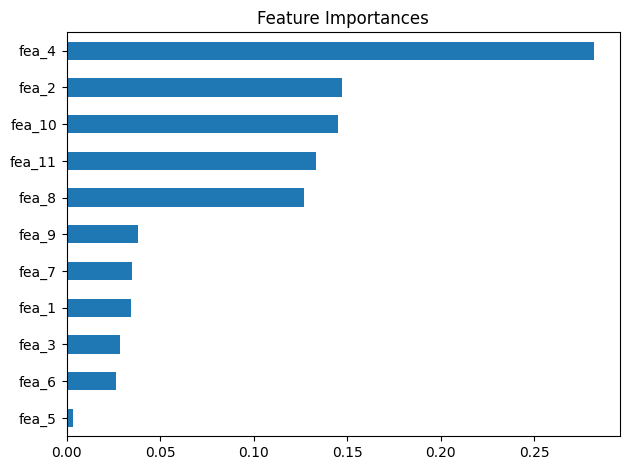

In [11]:
# Step 7: Plot feature importances
importances = pd.Series(model.feature_importances_, index=X.columns).sort_values()
importances.plot(kind="barh", title="Feature Importances")
plt.tight_layout()
plt.show()

In [12]:
# Step 8: Hyperparameter tuning using Grid Search
params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10],
    'min_samples_leaf': [1, 5]
}
grid = GridSearchCV(RandomForestClassifier(random_state=42), params, cv=5, scoring="f1", n_jobs=-1)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10], 'min_samples_leaf': [1, 5],
                         'n_estimators': [100, 200]},
             scoring='f1')

In [13]:
# Step 9: Display best parameters
print("=== Best Parameters from Grid Search ===")
print(grid.best_params_)

=== Best Parameters from Grid Search ===
{'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 200}
